# **Install tensorflow**
Import tensorflow into our colab and check the version.

In [ ]:
%tensorflow_version 2.x
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() ;
print("Tensorflow version " + tf.__version__)

Instructions for updating:
non-resource variables are not supported in the long term
Tensorflow version 2.7.0


# **Import of modules and functions**




In [ ]:
import numpy as np #Imports package NumPy
import matplotlib.pyplot as plt #Imports function pyplot
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

np.random.seed(25)

# **Load MINST data**
MINST dataset is a open dataset published on .It includes three types of data : 
55,000 training data (mnist.train), 10,000 test data (mnist.test) and 5,000  validation data (mnist.validation).


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


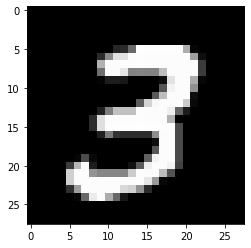

The data label is 3


In [ ]:
#Show one of the data from the input database
from matplotlib import pyplot as plt

plt.imshow(x_train[7], cmap='gray', vmin=0, vmax=255)
plt.show()

print("The data label is " + str(y_train[7]))

# **Preprocess the data**

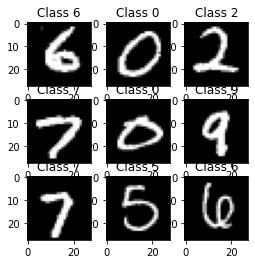

In [ ]:
#Split the data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=25)

plt.figure(figsize=(4,4))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title("Class %s" %y_train[i])

In [ ]:
# add channel
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
x_val = np.expand_dims(x_val, axis=3)
print(x_train.shape)
print(x_test.shape)
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255
x_val_normalized = x_val / 255

(48000, 28, 28, 1)
(10000, 28, 28, 1)


# **Define the function show training history**


In [ ]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

# **CNN Model Optimisation**

In [ ]:
from keras.utils import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
model.add(Conv2D(32, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation="relu", padding="same", data_format="channels_last"))
model.add(Conv2D(64, (3,3), activation="relu", padding="same", data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [ ]:
layer_utils.print_summary(model)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

# **Training the data with our model**



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [ ]:
y_train_onehot = np_utils.to_categorical(y_train)
y_val_onehot = np_utils.to_categorical(y_val)

gen = ImageDataGenerator(featurewise_center=False,
                         samplewise_center=False,
                         rotation_range=8, 
                         width_shift_range=0.08, 
                         shear_range=0.3,
                         height_shift_range=0.08, 
                         zoom_range=0.08,
                         data_format="channels_last")

gen.fit(x_train_normalized)
train_generator = gen.flow(x_train_normalized, y_train_onehot, batch_size=300)

test_gen = ImageDataGenerator(data_format="channels_last")
test_gen.fit(x_test_normalized)
test_generator = test_gen.flow(x_test_normalized, y_test, batch_size=300)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_function = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
# 開始訓練
train_history = model.fit_generator(train_generator, 
                                    steps_per_epoch=300, 
                                    epochs=30, 
                                    verbose=1,
                                    validation_data=(x_val, y_val_onehot),
                                    callbacks=[learning_rate_function])
#train_history = model.fit(x_train_normalized, y_train_onehot, validation_split=0.2, epochs=10, batch_size=300, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
300/300 [==============================] - 606s 2s/step - batch: 149.5000 - size: 300.0000 - loss: 0.0761 - acc: 0.9773 - val_loss: 5.5120 - val_acc: 0.9905 - lr: 0.0010
Epoch 2/30
300/300 [==============================] - 605s 2s/step - batch: 149.5000 - size: 300.0000 - loss: 0.0604 - acc: 0.9819 - val_loss: 4.1017 - val_acc: 0.9929 - lr: 0.0010
Epoch 3/30
300/300 [==============================] - 605s 2s/step - batch: 149.5000 - size: 300.0000 - loss: 0.0520 - acc: 0.9845 - val_loss: 4.1330 - val_acc: 0.9937 - lr: 0.0010
Epoch 4/30
300/300 [==============================] - 605s 2s/step - batch: 149.5000 - size: 300.0000 - loss: 0.0461 - acc: 0.9862 - val_loss: 4.6659 - val_acc: 0.9935 - lr: 0.0010
Epoch 5/30
300/300 [==============================] - 606s 2s/step - batch: 149.5000 - size: 300.0000 - loss: 0.0403 - acc: 0.9879 - val_loss: 4.5850 - val_acc: 0.9928 - lr: 0.0010
Epoch 6/30
300/300 [==============================] - 604s 2s/step - batch: 149.5000 - size: 30

In [ ]:
show_train_history(train_history, 'acc', 'val_acc')

NameError: ignored

In [ ]:
model.evaluate(x_test, y_test_onehot)

ValueError: ignored

In [ ]:
y_test_onehot = np_utils.to_categorical(y_test)
score = model.evaluate(x_test, y_test_onehot)
print()
print("Accuracy {}%".format(score[1]))

NameError: ignored